In [1]:
# Making necessary imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

# Fetching data
data = pd.read_csv('Housing Price data set.csv')
print(data.shape)
data.head()

(546, 13)


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [2]:
# Dropping unnecessary columns
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [36]:
# Mapping Yes and No to1 and 0 respectively
di = {'no': 0, 'yes': 1}
data=data.replace({'driveway':di,'recroom':di,'fullbase':di,'gashw':di,'airco':di,'prefarea':di})
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [37]:
# Normalize the features using mean normalization
data = (data - data.mean())/data.std()
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.68041,0.357239,-0.552865
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865


In [38]:
# Separate out the Feature and Target matrices
Y=data.iloc[:,0:1].values
#X=data[['lotsize','bedrooms','bathrms','stories','garagepl']].iloc[:,:]
X=data.drop(["price"],axis=1).iloc[:,:]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
print(X.shape)
print(Y.shape)

(546, 12)
(546, 1)


In [39]:
# Cost Function
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [40]:
# Set initial values for hyper-parameters
theta = np.zeros([1,X.shape[1]])
alpha = 0.5
iters = 1000
# Initial Cost
computeCost(X,Y,theta)

0.4990842490842497

In [41]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)    
    return theta,cost


In [42]:
print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function
g,cost = gradientDescent(X,Y,theta,iters,alpha)
print(g)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X,Y,g)
print('Cost after training : ',finalCost)

After  1000  iterations and learning rate =  0.5  we get the following Co-efficient matrix : 
[[-2.50511862e-16  2.87946766e-01  5.05903420e-02  2.69587765e-01
   2.13190534e-01  8.72497947e-02  6.46338332e-02  9.74693660e-02
   1.00534204e-01  2.20308331e-01  1.36918851e-01  1.48785592e-01]]
Cost after training :  0.16313885233553996


Text(0.5,1,'Error vs. Training Epoch')

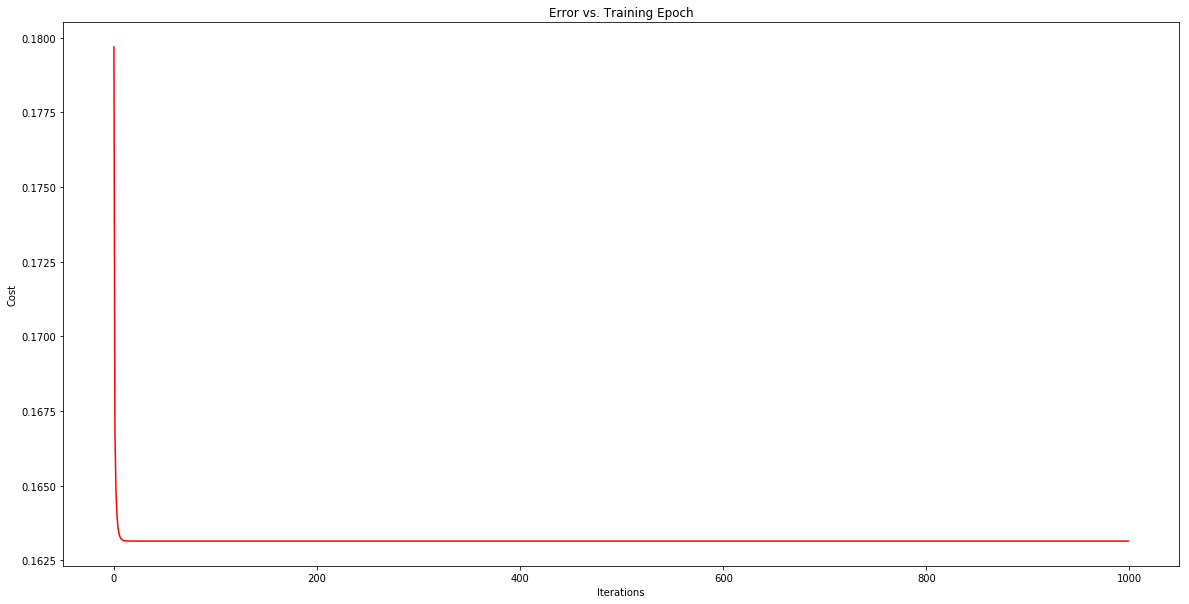

In [43]:
# Iteration vs Error(Cost) plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [14]:
# Normal Equation
theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X,Y,theta_norm.T)
print("Cost after applying Normal Equation : ",finalCost_norm)

Co-efficient matrix after applying Normal Equation : 
[[5.20417043e-17 2.87946766e-01 5.05903420e-02 2.69587765e-01
  2.13190534e-01 8.72497947e-02 6.46338332e-02 9.74693660e-02
  1.00534204e-01 2.20308331e-01 1.36918851e-01 1.48785592e-01]]
Cost after applying Normal Equation :  0.16313885233553996


In [15]:
print("Difference in Final Cost for Normal Equation and Gradient Descent(learning rate=",alpha,",iterations=",iters,") : ")
print(abs(finalCost_norm-finalCost))

Difference in Final Cost for Normal Equation and Gradient Descent(learning rate= 0.5 ,iterations= 1000 ) : 
0.0


In [ ]:
Conclusion:
    